In [24]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import h5py
from pathlib import Path
from FKMC.jobmanager import *

In [46]:
config = dict(
              mcmc_routine='quantum_cython_mcmc',
              N_steps = 500,
              bins = 1,
              N_burn_in = 100,
              N_system = np.array([16,32,64]),
              mu = 0,
              beta = 0.9,
              U = 5,
              V = -1,
              alpha= 1.5,
              outer_loop = np.array([], dtype=h5py.special_dtype(vlen=str)),
              inner_loop = np.array(['N_system'], dtype=h5py.special_dtype(vlen=str)),
              quantum = True,
              output_history = False,
              output_correlator = False,
              output_state = False,
              energy_max = 8,
              energy_min = -8,
              N_energy_bins = 500,
            )

working_dir = Path('../data/test')
setup_mcmc(config, working_dir, overwrite = True)

config = read_config_file(working_dir)
config

INFO:FKMC.jobmanager:Working in: ../data/test
INFO:FKMC.jobmanager:Sample results:
INFO:FKMC.jobmanager:['montecarlo.cpython-36m-x86_64-linux-gnu.so', 'shared_mcmc_routines.cpython-36m-x86_64-linux-gnu.so', 'CMTH_runscript.sh', 'jobmanager.py', '__init__.py', '__pycache__', 'stats.py', 'montecarlo.c', 'wrapped_C_functions.c', 'shared_mcmc_routines.c', 'quantum_montecarlo.cpython-36m-x86_64-linux-gnu.so', 'quantum_montecarlo.c', 'CX1_runscript.sh', 'wrapped_C_functions.cpython-36m-x86_64-linux-gnu.so']
#!/usr/bin/env bash
#PBS -N test
#PBS -lselect=1:ncpus=1:mem=4gb:avx=true
#PBS -lwalltime=24:00:00
#PBS -J 1-1
#PBS -j oe

echo ------------------------------------------------------
echo -n 'Job is running on node '; cat $PBS_NODEFILE
echo ------------------------------------------------------
echo PBS: qsub is running on $PBS_O_HOST
echo PBS: originating queue is $PBS_O_QUEUE
echo PBS: executing queue is $PBS_QUEUE
echo PBS: working directory is $PBS_O_WORKDIR
echo PBS: execution mode i

/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/FKMC/stats.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.sqrt(np.mean(np.split(O, M), axis = -1).var(ddof = 1) / M)
/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'mcmc_routine': 'quantum_cython_mcmc',
 'N_steps': 500,
 'bins': 1,
 'N_burn_in': 100,
 'N_system': array([16, 32, 64]),
 'mu': 0,
 'beta': 0.9,
 'U': 5,
 'V': -1,
 'alpha': 1.5,
 'outer_loop': array([], dtype=object),
 'inner_loop': array(['N_system'], dtype=object),
 'quantum': True,
 'output_history': False,
 'output_correlator': False,
 'output_state': False,
 'energy_max': 8,
 'energy_min': -8,
 'N_energy_bins': 500}

In [47]:
%%time
from FKMC.jobmanager import outer_loop_shape
logging.getLogger().setLevel(logging.INFO)

working_dir = Path('../data/test')
config = read_config_file(working_dir)
outer_job_length = outer_loop_shape(config).prod()

for job_id in range(outer_job_length):
    run_mcmc(job_id, working_dir = working_dir, overwrite = True)
print('DONE!')

INFO:FKMC.jobmanager:job_id: 0
INFO:FKMC.jobmanager:This jobs outer_config is {'outer_loop_index': 0, 'outer_loop_indices': ()}
INFO:FKMC.jobmanager:Starting MCMC routine <built-in function quantum_cython_mcmc> inner loop
INFO:FKMC.jobmanager:Since it's the first one, creating the datasets:
INFO:FKMC.jobmanager:Done: Inner Job: 0 indices: (0,) runtime: 0.71 seconds


/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/FKMC/stats.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.sqrt(np.mean(np.split(O, M), axis = -1).var(ddof = 1) / M)
/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


INFO:FKMC.jobmanager:Done: Inner Job: 1 indices: (1,) runtime: 2.13 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 2 indices: (2,) runtime: 13.10 seconds
INFO:FKMC.jobmanager:MCMC routine finished after 15.95 seconds
DONE!
CPU times: user 54.7 s, sys: 648 ms, total: 55.4 s
Wall time: 16 s


In [48]:
%%time
#the problem is that the correlator is a different shape for each value of N_system,

import logging
logging.getLogger().setLevel(logging.INFO)

gather_mcmc(working_dir, do_all = True)

INFO:FKMC.jobmanager:copied_in wasn't in config, initialising it
INFO:FKMC.jobmanager:Number of Jobs to copy in: 1
INFO:FKMC.jobmanager:Job IDs: [0]...
INFO:FKMC.jobmanager:missing : []
INFO:FKMC.jobmanager:Jobs attempted this time: 1
INFO:FKMC.jobmanager:Overall completion: 1.0 / (1.0, 3)
INFO:FKMC.jobmanager:File size: 0.00Gb
CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 26.8 ms


['IPR_histogram', 'classical_energies_moments', 'classical_energies_moments_err', 'flag_6', 'magnetisations_moments', 'magnetisations_moments_err', 'numbers_moments', 'numbers_moments_err', 'q_energy_bounds', 'q_energy_histogram', 'q_energy_histogram_bins', 'quantum_energies_moments', 'quantum_energies_moments_err', 'runtime']
[]
['N_system']


TypeError: 'numpy.int64' object is not iterable

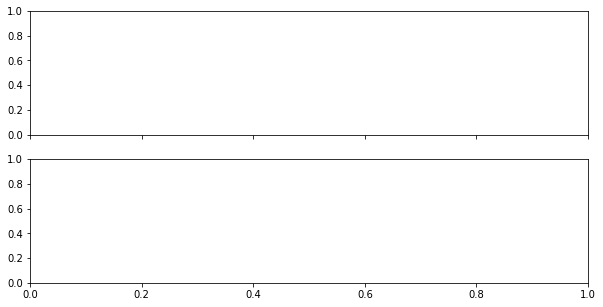

In [49]:
class objectview(object):
    def __init__(self, dict_like):
        self.dict_like = dict_like

    def __getattr__(self, name):
        return self.dict_like[name]

result_filename = working_dir / 'results.hdf5'
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        
        print(list(data.keys()))
        print(data.attrs['outer_loop'])
        print(data.attrs['inner_loop'])
        
        betas = data.attrs['beta']
    
        f, (Eax, Iax) = plt.subplots(2,1, figsize = (10,5), sharex = 'col')
        Uindx = 0
        for i,U in enumerate(config.U):
            Eax.plot(r.q_energy_histogram_bins[0,:-1] - config.U[0]/2,  r.q_energy_histogram[0,:], label = f'Energy {i}')
            Iax.plot(r.q_energy_histogram_bins[0,:-1] - config.U[0]/2,  r.IPR_histogram[0,:], label = f'Energy {i}')
        
        Eax.legend()
        Iax.set(xlim=(-4,5))

In [ ]:
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        print(print([dim.label for dim in r.numbers_moments.dims]))

        f, axes = plt.subplots(config.beta.size,1, figsize = (10,10), sharex = 'col')
        Uindx = 0
        for j,beta in enumerate(config.beta):
            for i,N in enumerate(config.N_system):
                axes[j].plot(r.q_energy_histogram_bins[i,Uindx,j,:-1]  - config.U[Uindx]/2,  r.q_energy_histogram[i,Uindx,j,:], label = N)
                axes[j].set(title = f'{beta}', xlim = (-4,4))
        axes[0].legend()
        #axes.set(ylim=(-1,100))